# Use Case - Stores, Hexbin and Distributor Relationship
## Part One - Data Prep

In this section, we will prepare another spatial dataset for our use case. While we have already prepared spatial datasets (along with their attribute information) with the market optimization datset and store locations, we will prepare one more - distributor locations. 

We will go through the process of converting raw data that contains a field indicating latitude and longitude into a spatial dataframe (being that this is a `point` spatial object). We will prepare this data so it is primed for immediate analysis in our use case. 

Note that this data is using a .csv exported from DBeaver - in the future, you can incorporate AWS Data Wrangler and import and export data back and forth between S3 buckets. 

In [1]:
# Library Import 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Remove Truncated cells
pd.options.display.max_rows = 4000

In [2]:
# location -> supplychain.location_current
# 6280 rows x 257 columns
df = pd.read_csv('../../01_Data/01_Initial/location_current.csv')
df

/Users/ozzycampos/anaconda3/envs/geo/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (14,56,84,93,116) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gln,distributor_dist_distributioncenter,distributor_dist_name,distributor_dist_shortname,attributes_loc_attribute_loc_name,attributes_loc_attribute_loc_value,closedate,conceptcode,countryname,dflsused,...,treasuryaccountant_people_personguid,treasuryaccountant_people_personid,last_refresh_date,remodelclosedate,remodelprojectedclosedate,remodelprojectedreopendate,remodelreopendate,filepath,insert_timestamp,load_date
0,883380801135,QCD-Pineville NC,Quality Custom Distribution,Quality Custom Distribution,SSParticipation,False,NaN,LIC,United States,NaN,...,NaN,NaN,2021-11-21,NaN,NaN,NaN,NaN,s3://cfadatalakeprod-useast1-dl-common-0077-in...,2021-11-21 10:30:53.229,2021-11-21
1,883380801647,QCD-Suffolk VA,Quality Custom Distribution,Quality Custom Distribution,SSParticipation,False,NaN,LIC,United States,NaN,...,NaN,NaN,2021-11-21,NaN,NaN,NaN,NaN,s3://cfadatalakeprod-useast1-dl-common-0077-in...,2021-11-21 10:30:53.229,2021-11-21
2,883380017673,McLane-Riverside CA,MCLANE COMPANY INC,MCLANE COMPANY INC,SSParticipation,True,NaN,CFA,United States,NaN,...,a9ad0843261a48a5a2de9115acc4f73f,1272672.0,2021-11-21,NaN,2022-08-25,2022-10-27,NaN,s3://cfadatalakeprod-useast1-dl-common-0077-in...,2021-11-21 10:30:53.229,2021-11-21
3,883380007704,QCD-Apopka FL,Quality Custom Distribution,Quality Custom Distribution,SSParticipation,True,NaN,CFA,United States,NaN,...,827fe50d6830474a85eef3b640a8cbec,1748985.0,2021-11-21,NaN,2023-01-02,2023-05-25,NaN,s3://cfadatalakeprod-useast1-dl-common-0077-in...,2021-11-21 10:30:53.229,2021-11-21
4,883380004581,MB-Atlanta GA,MARTIN BROWER,MARTIN BROWER,SSParticipation,True,NaN,CFA,United States,NaN,...,1988edc17e0bbc49971a8e6a45dd89c3,192117.0,2021-11-21,NaN,NaN,2007-06-04,2007-06-04,s3://cfadatalakeprod-useast1-dl-common-0077-in...,2021-11-21 10:30:53.229,2021-11-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,883380008282,MB-Atlanta GA,MARTIN BROWER,MARTIN BROWER,SSParticipation,True,NaN,CFA,United States,NaN,...,7ac4a2462edd49e2a0a9f98851531c72,2097462.0,2021-11-21,NaN,NaN,NaN,NaN,s3://cfadatalakeprod-useast1-dl-common-0077-in...,2021-11-21 10:30:53.229,2021-11-21
6276,883380040800,CFA Supply-Cartersville GA DC 2,CFA Supply,CFA Supply,SSParticipation,True,NaN,CFA,United States,NaN,...,2c37db729f1f423493eab938b2057262,2339666.0,2021-11-21,NaN,NaN,NaN,NaN,s3://cfadatalakeprod-useast1-dl-common-0077-in...,2021-11-21 10:30:53.229,2021-11-21
6277,883380010643,FA-Jessup MD,Food Authority South,Food Authority South,SSParticipation,True,NaN,CFA,United States,NaN,...,cbd47594f2c549618eecbceba7a0df91,2132989.0,2021-11-21,NaN,NaN,2009-09-03,NaN,s3://cfadatalakeprod-useast1-dl-common-0077-in...,2021-11-21 10:30:53.229,2021-11-21
6278,883380015259,QCD-Phoenix AZ,Quality Custom Distribution,Quality Custom Distribution,SSParticipation,True,NaN,CFA,United States,NaN,...,2dc26dc462c645a19fe8bcc5c9eb1cdd,2065239.0,2021-11-21,NaN,2022-02-04,2022-05-19,NaN,s3://cfadatalakeprod-useast1-dl-common-0077-in...,2021-11-21 10:30:53.229,2021-11-21


### Select Useful Information
This is a large dataset that should probably be broken up into several normalized datasets, tied together with a unique ID. There are 6280 records and 257 columns - many of these columns appear to be nearly empty or contain metadata, but for our use case, we are looking for 
1. Unique identifier for the data
2. Latitude and longitude 
3. Characteristic, such as a name
4. Any data that would be helpful in filtering or further analysis

For this project, we will use `gln` as the identifier, `gps_loc_latitude` and `gps_loc_longitude` as our spatial object, and the `distributor_dist_name` as the unique characteristic. 

In [3]:
# Primary objective - find an index, a description and a lat/long pair
print(df.dtypes)

gln                                                                                     int64
distributor_dist_distributioncenter                                                    object
distributor_dist_name                                                                  object
distributor_dist_shortname                                                             object
attributes_loc_attribute_loc_name                                                      object
attributes_loc_attribute_loc_value                                                       bool
closedate                                                                             float64
conceptcode                                                                            object
countryname                                                                            object
dflsused                                                                              float64
directmarketcode                                            

In [4]:
# Extract the variables that will be of use in a spatial dataframe
col = ['gln', 'distributor_dist_name', 'gps_loc_latitude', 'gps_loc_longitude']
df_geo = df[col]

In [5]:
df_geo

,gln,distributor_dist_name,gps_loc_latitude,gps_loc_longitude
0,883380801135,Quality Custom Distribution,35.787780,-78.670772
1,883380801647,Quality Custom Distribution,36.886650,-76.306410
2,883380017673,MCLANE COMPANY INC,34.070586,-117.203702
3,883380007704,Quality Custom Distribution,28.035780,-80.648160
4,883380004581,MARTIN BROWER,33.807672,-84.412953
...,...,...,...,...
6275,883380008282,MARTIN BROWER,33.716315,-84.216075
6276,883380040800,CFA Supply,34.992194,-85.201347
6277,883380010643,Food Authority South,39.678813,-75.651395
6278,883380015259,Quality Custom Distribution,33.638318,-112.352559


### Basic Cleansing 
Spatial dataframes are sensitive to empty values - even one empty latitude or longitude value will error out your query in certain software and programming languages. We want to remove these to ensure the values of the lat/long pairs are plottable. 

In [6]:
# User Input - String values of lat/long value
lat = 'gps_loc_latitude'
lon = 'gps_loc_longitude'

# Remove NaN from Lat/Long
df_geo = df_geo.dropna(subset = [lat])
df_geo = df_geo.dropna(subset = [lon])

In [7]:
df_geo

,gln,distributor_dist_name,gps_loc_latitude,gps_loc_longitude
0,883380801135,Quality Custom Distribution,35.787780,-78.670772
1,883380801647,Quality Custom Distribution,36.886650,-76.306410
2,883380017673,MCLANE COMPANY INC,34.070586,-117.203702
3,883380007704,Quality Custom Distribution,28.035780,-80.648160
4,883380004581,MARTIN BROWER,33.807672,-84.412953
...,...,...,...,...
6275,883380008282,MARTIN BROWER,33.716315,-84.216075
6276,883380040800,CFA Supply,34.992194,-85.201347
6277,883380010643,Food Authority South,39.678813,-75.651395
6278,883380015259,Quality Custom Distribution,33.638318,-112.352559


### Spatial Dataframe 
Note that this datatype is now a geopandas geodataframe - this is defined by the 'geometry' column, built with our lat/long identities. We are working with single points, although we can also work with lines and polygons. Note that, if necessary, we could group any of the three vector data types together and create a 'Multi-' value, with several grouped together which share the same attribute information. For instance, if we wanted to group our data by `distributor_dist_name`, we could create a `MULTIPOINT` object that contains the points for 'Quality Custom Distribution' - the three points would be grouped together on one line and share the same attribute information. For this case study, we will leave it as is. 

* Points / Multi-Points
* Lines / Multi-Lines
* Polygons / Multi-Polygons

In [18]:
# Convert this into a geospatial dataframe using the geopandas package
gdf = gpd.GeoDataFrame(df_geo, geometry = gpd.points_from_xy(df[lon], df[lat]))

### Visualization
Visualizing the data before working with it is essential. It is difficult to identify issues in the data by simply looking at a series of several thousand numbers, but by mapping out the data, we can identify issues. Start by visualizing this data throughout the whole world - in this case, there appear to be no errant points. All are within the United States and Puerto Rico. We can use a spatial join to CONUS to remove the distributor locations in Puerto Rico, as our store locations and hexbin data created earlier are all based fully within CONUS. Doing this reduces the dataset by 20 records. 

#### Common Issues
It is common to find errors with geospatial data. Some of the most common include:
1. Leaving a Lat/Long empty if not known
2. Including a filler value in Lat/Long
3. Auto-Conversion into 0/0 (plots in the Gulf of Guinea
4. Missing negative in Longitude (Western Hemisphere is negative)

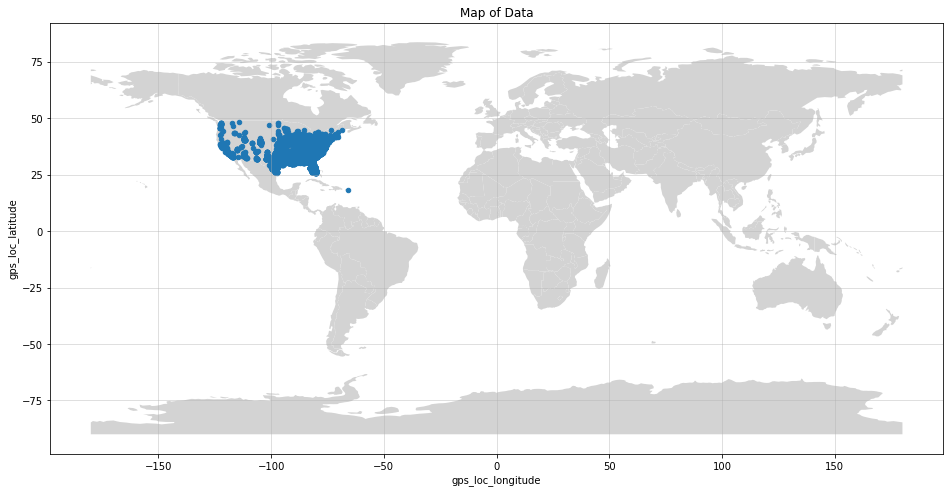

In [19]:
# Initialize axis
fig, ax = plt.subplots(figsize=(16,12))
# Plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres")
)
countries.plot(color="lightgrey", ax=ax)
# Plot Points
df.plot(
    x=lon, 
    y=lat, 
    kind="scatter", 
    colormap="YlOrRd", 
    title='Map of Data', 
    ax=ax
)
# Add Grid
ax.grid(b=True, alpha=0.5)
plt.show()

In [20]:
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres")
)

# Filter to points only within the US
us_map = countries.loc[countries['name'] == 'United States of America']

gdf = gdf.set_crs('EPSG:4326')

# Spatial join - Keeps only points within the US 
gdf = gpd.sjoin(gdf, us_map, how='inner')

In [21]:
gdf

,gln,distributor_dist_name,gps_loc_latitude,gps_loc_longitude,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
0,883380801135,Quality Custom Distribution,35.787780,-78.670772,POINT (-78.67077 35.78778),4,326625791,North America,United States of America,USA,18560000.0
1,883380801647,Quality Custom Distribution,36.886650,-76.306410,POINT (-76.30641 36.88665),4,326625791,North America,United States of America,USA,18560000.0
2,883380017673,MCLANE COMPANY INC,34.070586,-117.203702,POINT (-117.20370 34.07059),4,326625791,North America,United States of America,USA,18560000.0
3,883380007704,Quality Custom Distribution,28.035780,-80.648160,POINT (-80.64816 28.03578),4,326625791,North America,United States of America,USA,18560000.0
4,883380004581,MARTIN BROWER,33.807672,-84.412953,POINT (-84.41295 33.80767),4,326625791,North America,United States of America,USA,18560000.0
...,...,...,...,...,...,...,...,...,...,...,...
6275,883380008282,MARTIN BROWER,33.716315,-84.216075,POINT (-84.21608 33.71632),4,326625791,North America,United States of America,USA,18560000.0
6276,883380040800,CFA Supply,34.992194,-85.201347,POINT (-85.20135 34.99219),4,326625791,North America,United States of America,USA,18560000.0
6277,883380010643,Food Authority South,39.678813,-75.651395,POINT (-75.65140 39.67881),4,326625791,North America,United States of America,USA,18560000.0
6278,883380015259,Quality Custom Distribution,33.638318,-112.352559,POINT (-112.35256 33.63832),4,326625791,North America,United States of America,USA,18560000.0


In [22]:
# Remove unnecessary columns
gdf = gdf.drop(columns = ['gps_loc_latitude', 'gps_loc_longitude', 
                          'index_right', 'continent', 'pop_est', 
                          'name', 'iso_a3', 'gdp_md_est' ])
gdf

,gln,distributor_dist_name,geometry
0,883380801135,Quality Custom Distribution,POINT (-78.67077 35.78778)
1,883380801647,Quality Custom Distribution,POINT (-76.30641 36.88665)
2,883380017673,MCLANE COMPANY INC,POINT (-117.20370 34.07059)
3,883380007704,Quality Custom Distribution,POINT (-80.64816 28.03578)
4,883380004581,MARTIN BROWER,POINT (-84.41295 33.80767)
...,...,...,...
6275,883380008282,MARTIN BROWER,POINT (-84.21608 33.71632)
6276,883380040800,CFA Supply,POINT (-85.20135 34.99219)
6277,883380010643,Food Authority South,POINT (-75.65140 39.67881)
6278,883380015259,Quality Custom Distribution,POINT (-112.35256 33.63832)


## Exporting Spatial DataFrames 
There are several ways to export spatial dataframes, but we will export it as a GeoJSON for simplicity. 

In [23]:
# Athena needs csv to not have a header
# gdf.to_csv("./01_Data/03_CSV_Athena/supplier_location_current.csv", index = False, header = False)
 
# For other purposes, .csv should have header
gdf.to_file("../../01_Data/02_GeoJSON/Distributors.geojson", driver='GeoJSON')